# 事前準備：共通コードの実行
* このノートブックに接続したら，まずは以下の2つの共通コード（コードAとコードB）を実行する
* これらの共通コードを実行しないと，それ以降のコードが実行できないので注意する
* また，コードAとコードBは，ノートブックに接続するたび毎回実行すること（ノートブックに接続中は，何度も実行する必要はない）
* 共通コードの詳細についての説明は割愛する（簡単な説明は第2回の「[サンプルノートブック02](https://colab.research.google.com/github/yoshida-nu/lec_datascience/blob/main/doc/datascience_notebook02.ipynb)」を参照）

In [ ]:
# コードA：日本語化ライブラリ導入
! pip install japanize-matplotlib | tail -n 1

In [2]:
# コードB：共通事前処理

# B1:余分なワーニングを非表示にする
import warnings
warnings.filterwarnings('ignore')

# 必要ライブラリのimport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib # matplotlib日本語化対応
import seaborn as sns

# B2:データフレーム表示用関数
from IPython.display import display

# B3:表示オプション調整
np.set_printoptions(suppress = True, precision = 3) #numpyの浮動小数点の表示精度
pd.options.display.float_format = '{:.3f}'.format #pandasでの浮動小数点の表示精度
pd.set_option('display.max_columns', None) #データフレームですべての列データを表示

# B4:グラフのデフォルトフォント指定
plt.rcParams['font.size'] = 14

# 乱数の種
random_seed = 0

# 線形単回帰モデルの学習

## 用いるデータと分析の目的
* 例として，前回使用した以下のURLにあるアヤメデータのcsvファイルを用いる
>* https://bit.ly/43mPz0L
* アイリスデータを用いて「花弁長さ」から「花弁幅」を予測することを考える
* そのために，説明変数$x$を「花弁長さ」，目的変数$y$を「花弁幅」とした線形単回帰モデルの学習を行う

## データの読み込みと欠損値への対処
* 前回確認したように，アヤメデータの各説明変数には欠損値が存在する
* 前回と同様にして，csvファイルを読み込み後，欠損値を各説明変数の算術平均で置き換える
  
**［以下のコードの処理内容］**
*  1行目: ファイルのURLを変数`url`に代入
*  2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df`に代入
*  3行目: `fillna`メソッドを使って，`df.fillna(df[['がく片長さ','がく片幅', '花弁長さ', '花弁幅']].mean())`とし，欠損値を各説明変数の算術平均にそれぞれ置き換えて変数`df`に代入
>* `fillna`メソッドの引数は，各説明変数の算術平均
>* 各説明変数の算術平均は，`mean`メソッドを使って `df[['がく片長さ','がく片幅', '花弁長さ', '花弁幅']].mean()`とすることで計算できる
*  4行目: `display`関数を使ってデータ（`df`の内容）を表示


In [3]:
url = 'https://bit.ly/43mPz0L'
df = pd.read_csv(url)
df = df.fillna(df[['がく片長さ', 'がく片幅', '花弁長さ', '花弁幅']].mean())
display(df)

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
0,0.220,0.630,0.080,0.040,setosa
1,0.170,0.420,0.350,0.040,setosa
2,0.110,0.500,0.130,0.040,setosa
3,0.080,0.460,0.260,0.040,setosa
4,0.190,0.670,0.440,0.040,setosa
...,...,...,...,...,...
145,0.670,0.420,0.540,0.920,virginica
146,0.560,0.210,0.690,0.460,virginica
147,0.610,0.420,0.487,0.790,virginica
148,0.530,0.580,0.630,0.920,virginica


## 花弁長さと花弁幅の散布図の作成
*  pypolotモジュールの`scatter`関数で散布図を作成できる
*  詳細は[第2回のサンプルノートブック](https://colab.research.google.com/github/yoshida-nu/lec_datascience/blob/main/doc/datascience_notebook02.ipynb)を参照
  
**［以下のコードの処理内容］**
*  1行目: ファイルのURLを変数`url`に代入
*  2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df`に代入
*  3行目: `fillna`メソッドを使って，`df.fillna(df[['がく片長さ','がく片幅', '花弁長さ', '花弁幅']].mean())`とし，欠損値を各説明変数の算術平均にそれぞれ置き換えて変数`df`に代入
*  4行目: `scatter`関数を使って花弁長さと花弁幅の散布図を作成
>*  `df['花弁長さ']`でx軸を指定
>*  `df['花弁幅']`でy軸を指定
*  5～6行目: `xlabel`関数と`ylabel`関数各軸のラベルをそれぞれ「花弁長さ」「花弁幅」に設定
*  7行目: `show`関数で，それまでに設定した図（散布図）を実行画面に表示

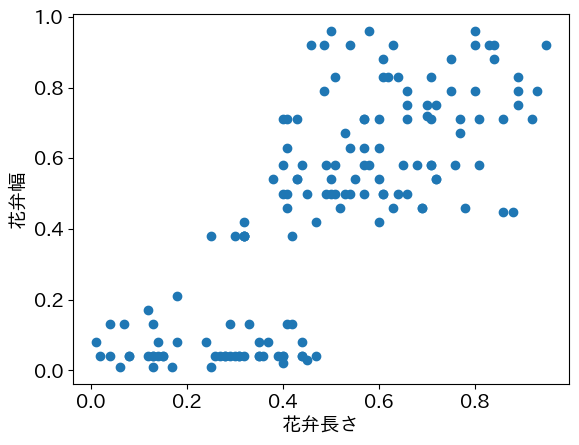

In [4]:
url = 'https://bit.ly/43mPz0L'
df = pd.read_csv(url)
df = df.fillna(df[['がく片長さ', 'がく片幅', '花弁長さ', '花弁幅']].mean())
plt.scatter(df['花弁長さ'], df['花弁幅'])
plt.xlabel('花弁長さ')
plt.ylabel('花弁幅')
plt.show()

## 線形回帰モデル
* scikit-learnの`linear_model`モジュールを読み込むことで線形回帰モデルが利用できる
>* 線形単回帰モデルと線形重回帰モデルは，どちらも`linear_model`モジュールを用いる
* `linear_model`モジュールには「線形」で表現できる様々なモデルを扱うためのクラスが複数用意されている
* モデルの学習をするためには，対応するクラスのオブジェクトをまずは生成する必要がある
* 線形回帰モデルの場合は，`linear_model`モジュールにおける`LinearRegression`クラスのオブジェクトを生成する
>* [LinearRegressionクラスの公式ドキュメント](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
* オブジェクト生成の書式: `クラス名(引数)`
>* クラスを読み込んでいる場合の書式
* 一般に生成したオブジェクトを変数に代入して利用する

## 線形回帰モデルの学習準備
* `sklearn`の`linear_model`モジュール内にある`LinearRegression`クラスを読み込む ⇒ `from sklearn.linear_model import LinearRegression`
* オブジェクトを生成する ⇒ `LinearRegression()`
>* 引数は指定しない
>* 線形回帰モデルでは決定木モデルのような乱数を使った学習は行わない（乱数を使わない）
* 生成したオブジェクトは変数に代入して取り扱う

## 線形回帰モデルの学習
* オブジェクトを生成したら，線形回帰モデルの学習を実行する
* 学習は前回と同様にホールドアウト法を用いる
>* よって，データを訓練データとテストデータに分割する
* 分類木モデルと同様に，線形回帰モデルの学習は，`fit`メソッドを利用して実行する
* `fit`メソッドの引数には，説明変数に対応する説明変数データと目的変数に対応する実際のデータ（正解データ）を指定する
* モデルの学習の書式: `変数.fit(X = [説明変数データ], y = [目的変数データ])`
>* 変数名はオブジェクトを代入した変数の名前
>* 「`X =`」で説明変数，「`y =`」で目的変数を指定する
* 学習済みモデルの情報は，`fit`メソッドを適用後のオブジェクトの属性から参照できる
* 同様にモデルの評価のために必要な情報も属性から参照できる
  
**［以下のコードの処理内容］**
* 1行目: ファイルのURLを変数`url`に代入
* 2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df`に代入
* 3行目: `fillna`メソッドを使って，`df.fillna(df[['がく片長さ','がく片幅', '花弁長さ', '花弁幅']].mean())`とし，欠損値を各説明変数の算術平均にそれぞれ置き換えて変数`df`に代入
* 4行目: 説明変数の列名を要素とするリスト`['花弁長さ']`を変数`x_cols`に代入
* 5行目: 目的変数の列名（リスト）`['花弁幅']`を変数`t_col`に代入
* 6行目: DataFrame `df` から,`df[x_cols]`で，説明変数の列だけ取り出し変数`x`に代入
* 7行目: DataFrame `df` から,`df[t_col]`で目的変数の列だけ取り出し変数`t`に代入
* 8行目: `model_selection`モジュールの`train_test_split`関数の読み込み
* 9行目: `train_test_split`関数を使って説明変数データ`x`と目的変数データ（正解データ）`t`を訓練データとテストデータにそれぞれ分割
>* `test_size = 0.3`として，訓練データを7割（105個），テストデータを3割（45個）に分割
>* `random_state = random_seed`として，乱数を固定する ⇒ 結果が同じになる
>* `x_train`: 訓練データの説明変数データ
>* `x_test`: テストデータの説明変数データ
>* `t_train`: 訓練データの目的変数データ
>* `t_test`: テストデータの目的変数データ
* 10行目:  `sklearn` (scikit-learn) の`linear_model`モジュール内にある`LinearRegression`クラスを読み込む 
* 11行目: `LinearRegression()`で，線形回帰モデルの学習を行うためのオブジェクトを`LinearRegression`クラスから生成し，変数`linear_regression_model`に代入
* 12行目: `fit`メソッドで線形回帰モデルの学習を実行

In [17]:
url = 'https://bit.ly/43mPz0L'
df = pd.read_csv(url)
df = df.fillna(df[['がく片長さ', 'がく片幅', '花弁長さ', '花弁幅']].mean())
x_cols = ['花弁長さ']
t_col = ['花弁幅']
x = df[x_cols]
t = df[t_col]
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.3, random_state = random_seed)
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression()
linear_regression_model.fit(X = x_train, y = t_train)

LinearRegression()

## 学習済みモデルを使った予測
* 目的変数の値が未知の説明変数データから目的変数の値を推測することを予測と呼ぶ
>* 今回の例は回帰に対する予測
* 予測は`predict`メソッドを用いる
>* 書式: `変数.predict(X = 説明変数データ)`
>* 戻り値は予測結果
>* 予測結果のデータ型はNumPyの配列（ndarray）
  
**［以下のコードの処理内容］**
* 1行目: ファイルのURLを変数`url`に代入
* 2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df`に代入
* 3行目: `fillna`メソッドを使って，`df.fillna(df[['がく片長さ','がく片幅', '花弁長さ', '花弁幅']].mean())`とし，欠損値を各説明変数の算術平均にそれぞれ置き換えて変数`df`に代入
* 4行目: 説明変数の列名を要素とするリスト`['花弁長さ']`を変数`x_cols`に代入
* 5行目: 目的変数の列名（リスト）`['花弁幅']`を変数`t_col`に代入
* 6行目: DataFrame `df` から,`df[x_cols]`で，説明変数の列だけ取り出し変数`x`に代入
* 7行目: DataFrame `df` から,`df[t_col]`で目的変数の列だけ取り出し変数`t`に代入
* 8行目: `model_selection`モジュールの`train_test_split`関数の読み込み
* 9行目: `train_test_split`関数を使って説明変数データ`x`と目的変数データ（正解データ）`t`を訓練データとテストデータにそれぞれ分割
* 10行目: `sklearn` (scikit-learn) の`linear_model`モジュール内にある`LinearRegression`クラスを読み込む 
* 11行目: `LinearRegression()`で，線形回帰モデルの学習を行うためのオブジェクトを`LinearRegression`クラスから生成し，変数`linear_regression_model`に代入
* 12行目: `fit`メソッドで線形回帰モデルの学習を実行
* 13行目: 新しい3個の説明変数データのリスト`[[1.5], [3.8], [6.1]]`を変数`newdata`に代入
* 14行目: `predict`メソッドを用いて，新たな説明変数データ`newdata`に対する予測を行い，その結果（`predict`メソッドの戻り値）を変数`y_pred`に代入
>*  `predict`メソッドの引数で指定する`X`のクラス（データ型）は，厳密には ndarray または DataFrame にする必要がある
>*  ここでは，問題なく実行できるので，リストのまま使用している
* 15行目: `print`関数で，「予測結果：」と表示
* 16行目: 予測結果`y_pred`を`print`関数で表示

In [11]:
url = 'https://bit.ly/43mPz0L'
df = pd.read_csv(url)
df = df.fillna(df[['がく片長さ', 'がく片幅', '花弁長さ', '花弁幅']].mean())
x_cols = ['花弁長さ']
t_col = ['花弁幅']
x = df[x_cols]
t = df[t_col]
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.3, random_state = random_seed)
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression()
linear_regression_model.fit(X = x_train, y = t_train)
newdata = [[1.5], [3.8], [6.1]]
y_pred = linear_regression_model.predict(X = newdata)
print('予測結果：')
print(y_pred)

予測結果：
[[1.544]
 [4.025]
 [6.505]]


## モデルの評価
* 分類木モデルの代表的な評価指標 ⇒ 精度（Accuracy）
* 精度は分類を目的としたモデルの評価で使われる指標
* モデルの予測結果（分類結果）が当たっているかどうかを見る
>* つまり，目的変数が質的データであるから意味がある
* 回帰のように目的変数が量的データの場合には意味がない
>* モデルの予測結果と実際の値がどれくらい近いかを見ることには意味がある
* 線形回帰モデルの評価指標には平均絶対誤差や決定係数などが使われる
* 平均絶対誤差は予測結果と実際の値の差の絶対値の算術平均なので，データの性質を十分理解していないと評価できない
* 一方，決定係数は客観的な評価指標となる
* 今回は決定係数でモデルを評価する


### 決定係数
* $n$個の説明変数データと目的変数データ（正解データ）の組$(x_1, t_1), (x_2, t_2), \ldots , (x_n, t_n)$に対する決定係数は以下の式で定義される
$$
r_{xy}^{2} = 1 - \frac{\sum_{i=1}^{n} \left( t_i - y_i \right)^2}{\sum_{j=1}^{n} \left( t_i - \bar{t} \right)^2}
$$
>* $y_i$は学習済みモデル$f$による$x_i$に対する予測値 ⇒ $y_i = f (x_i)$
>* $\bar{t}$ は目的変数データの算術平均
>* 式の導出等の詳細は統計学の書籍などを参照する（本講義では必ずしも理解する必要はない）
* 決定係数は 0から1の間に値をとる客観的な評価指標（寄与率とも呼ばれる）
* 決定係数が1に近いほどモデルの予測結果と実際の値との当てはまりが良い
* 例えば，説明変数の値に関係なく目的変数の平均$\bar{t}$で予測，すなわち $y_i = f (x_i) = t_i$ の場合，第2項が1となり，決定係数は0となる
* 一般に0.8以上であれば良いモデルといえる（ただし，問題の領域による）
  
**［以下のコードの処理内容］**
* 1行目: ファイルのURLを変数`url`に代入
* 2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df`に代入
* 3行目: `fillna`メソッドを使って，`df.fillna(df[['がく片長さ','がく片幅', '花弁長さ', '花弁幅']].mean())`とし，欠損値を各説明変数の算術平均にそれぞれ置き換えて変数`df`に代入
* 4行目: 説明変数の列名を要素とするリスト`['花弁長さ']`を変数`x_cols`に代入
* 5行目: 目的変数の列名（リスト）`['花弁幅']`を変数`t_col`に代入
* 6行目: DataFrame `df` から,`df[x_cols]`で，説明変数の列だけ取り出し変数`x`に代入
* 7行目: DataFrame `df` から,`df[t_col]`で目的変数の列だけ取り出し変数`t`に代入
* 8行目: `model_selection`モジュールの`train_test_split`関数の読み込み
* 9行目: `train_test_split`関数を使って説明変数データ`x`と目的変数データ（正解データ）`t`を訓練データとテストデータにそれぞれ分割
* 10行目: `sklearn` (scikit-learn) の`linear_model`モジュール内にある`LinearRegression`クラスを読み込む 
* 11行目: `LinearRegression()`で，線形回帰モデルの学習を行うためのオブジェクトを`LinearRegression`クラスから生成し，変数`linear_regression_model`に代入
* 12行目: `fit`メソッドで線形回帰モデルの学習を実行
* 13行目: `linear_regression_model.score(X = x_train, y = t_train)`で，訓練データに対する決定係数を計算して変数`score_train`に代入
* 14行目: `linear_regression_model.score(X = x_test, y = t_test)`で，テストデータに対する決定係数を計算して変数`score_test`に代入
* 15行目: `print`関数とf-stringを使って，訓練データに対する決定係数（`score_train`）とテストデータに対する決定係数（`score_test`）を小数点以下3桁まで表示
>* f-string `f'決定係数: {score:.3f}'` の `:.3f`で表示桁を小数点以下3桁までに指定

In [13]:
url = 'https://bit.ly/43mPz0L'
df = pd.read_csv(url)
df = df.fillna(df[['がく片長さ', 'がく片幅', '花弁長さ', '花弁幅']].mean())
x_cols = ['花弁長さ']
t_col = ['花弁幅']
x = df[x_cols]
t = df[t_col]
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.3, random_state = random_seed)
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression()
linear_regression_model.fit(X = x_train, y = t_train)
score_train = linear_regression_model.score(X = x_train, y = t_train)
score_test = linear_regression_model.score(X = x_test, y = t_test)
print(f'訓練データの決定係数={score_train:.3f} / テストデータの決定係数={score_test:.3f}')

訓練データの決定係数=0.649 / テストデータの決定係数=0.434


## 回帰係数の確認
* 学習した線形重回帰モデルの回帰係数を確認する
* 回帰係数はオブジェクトの属性から確認できる
>* 回帰係数（定数項以外）: `変数.coef_`
>* 定数項: `変数.intercept_`

**［以下のコードの処理内容］**
* 1行目: ファイルのURLを変数`url`に代入
* 2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df`に代入
* 3行目: `fillna`メソッドを使って，`df.fillna(df[['がく片長さ','がく片幅', '花弁長さ', '花弁幅']].mean())`とし，欠損値を各説明変数の算術平均にそれぞれ置き換えて変数`df`に代入
* 4行目: 説明変数の列名を要素とするリスト`['花弁長さ']`を変数`x_cols`に代入
* 5行目: 目的変数の列名（リスト）`['花弁幅']`を変数`t_col`に代入
* 6行目: DataFrame `df` から,`df[x_cols]`で，説明変数の列だけ取り出し変数`x`に代入
* 7行目: DataFrame `df` から,`df[t_col]`で目的変数の列だけ取り出し変数`t`に代入
* 8行目: `model_selection`モジュールの`train_test_split`関数の読み込み
* 9行目: `train_test_split`関数を使って説明変数データ`x`と目的変数データ（正解データ）`t`を訓練データとテストデータにそれぞれ分割
* 10行目: `sklearn` (scikit-learn) の`linear_model`モジュール内にある`LinearRegression`クラスを読み込む 
* 11行目: `LinearRegression()`で，線形回帰モデルの学習を行うためのオブジェクトを`LinearRegression`クラスから生成し，変数`linear_regression_model`に代入
* 12行目: `fit`メソッドで線形回帰モデルの学習を実行
* 13行目: `coef_`属性から回帰係数（定数項以外）を取り出し，変数`a`に代入
* 14行目: `intercept_`属性から定数項を取り出し，変数`b`に代入
* 15行目: `print`関数とf-stringを使って，回帰係数`a`を表示
* 16行目: `print`関数とf-stringを使って，定数項`b`を小数点以下3桁で表示

In [14]:
url = 'https://bit.ly/43mPz0L'
df = pd.read_csv(url)
df = df.fillna(df[['がく片長さ', 'がく片幅', '花弁長さ', '花弁幅']].mean())
x_cols = ['花弁長さ']
t_col = ['花弁幅']
x = df[x_cols]
t = df[t_col]
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.3, random_state = random_seed)
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression()
linear_regression_model.fit(X = x_train, y = t_train)
a = linear_regression_model.coef_
b = linear_regression_model.intercept_
print(f'回帰係数（定数項以外）: {a}')
print(f'定数項: {b}')

回帰係数（定数項以外）: [[1.078]]
定数項: [-0.073]


## 線形単回帰モデルの可視化
* 線形単回帰モデル$f(x)$は，説明変数データと目的変数データ（正解データ）の散布図上に，直線として描画できる
* 直線は `pyplot`モジュールの`plot`関数を用いる
* `plot`関数の引数
>* 1番目（必須）: x座標の値
>* 2番目（必須）: y座標の値
>* `color`: 線の色（`red`, `blue`など）
>* `label`: 直線の名前（凡例に表示）
* 凡例は，`legend`関数を呼び出すことで表示できる
>* 書式: `legend()`
* x座標の値は，NumPyモジュールの`linspace`関数を使って指定する
* `linspace`関数は，指定された区間を等分割した数列を生成する関数
>* 書式: `np.linspace([開始値], [終了値], [要素数])`
>* 例: `np.linspace(0, 1, 11)` ⇒ 数列 0.0 , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0 を生成
>* `linspace`関数の戻り値（数列）のクラスは，`ndarray` というリストに似たクラス（特に気にしなくてよい）
* `linspace`関数で生成した数列を`predict`メソッドの引数とすることで，数列の各要素に対する予測値を取得できる
* 取得した予測値を`plot`関数の2番目の引数（y座標の値）とする
  
**［以下のコードの処理内容］**
* 1行目: ファイルのURLを変数`url`に代入
* 2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df`に代入
* 3行目: `fillna`メソッドを使って，`df.fillna(df[['がく片長さ','がく片幅', '花弁長さ', '花弁幅']].mean())`とし，欠損値を各説明変数の算術平均にそれぞれ置き換えて変数`df`に代入
* 4行目: 説明変数の列名を要素とするリスト`['花弁長さ']`を変数`x_cols`に代入
* 5行目: 目的変数の列名（リスト）`['花弁幅']`を変数`t_col`に代入
* 6行目: DataFrame `df` から,`df[x_cols]`で，説明変数の列だけ取り出し変数`x`に代入
* 7行目: DataFrame `df` から,`df[t_col]`で目的変数の列だけ取り出し変数`t`に代入
* 8行目: `model_selection`モジュールの`train_test_split`関数の読み込み
* 9行目: `train_test_split`関数を使って説明変数データ`x`と目的変数データ（正解データ）`t`を訓練データとテストデータにそれぞれ分割
* 10行目: `sklearn` (scikit-learn) の`linear_model`モジュール内にある`LinearRegression`クラスを読み込む 
* 11行目: `LinearRegression()`で，線形回帰モデルの学習を行うためのオブジェクトを`LinearRegression`クラスから生成し，変数`linear_regression_model`に代入
* 12行目: `fit`メソッドで線形回帰モデルの学習を実行
* 13行目: NumPyモジュールの`linspace`関数で，0～1の区間を等分割した100個の数列を生成し，変数`x_plot`に代入
* 14行目: `predict`メソッドで，`x_plot`の各値（100個）に対する予測値を計算
>* `predict`メソッドの引数は，DataFrameで指定する必要があるので，`DataFrame`関数を使って`x_plot`をDataFrameに変換する
>* 計算した100個の予測値を変数`y_plot`に代入
* 15行目: pylotモジュールの`scatter`関数で，花弁長さと花弁幅の散布図を作成
* 16行目: pylotモジュールの`plot`関数で，`x_plot`と`y_plot`の直線を描画
>* 引数`color = red`で直線の色を赤に設定
>* 引数`label = '線形単回帰モデル'` でラベル「線形単回帰モデル」を設定
* 17行目: `legend`関数で凡例を表示
* 18行目: `show`関数で，それまでに設定した図（散布図と直線）を実行画面に表示


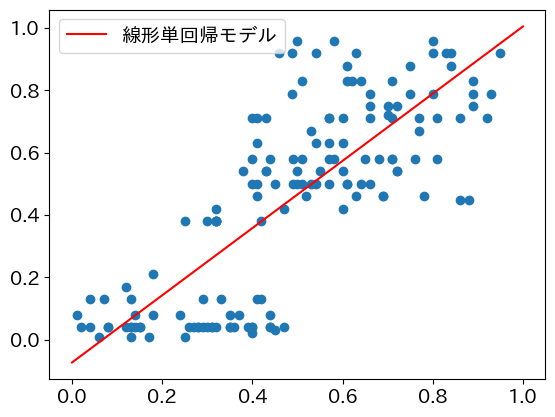

In [ ]:
url = 'https://bit.ly/43mPz0L'
df = pd.read_csv(url)
df = df.fillna(df[['がく片長さ', 'がく片幅', '花弁長さ', '花弁幅']].mean())
x_cols = ['花弁長さ']
t_col = ['花弁幅']
x = df[x_cols]
t = df[t_col]
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.3, random_state = random_seed)
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression()
linear_regression_model.fit(X = x_train, y = t_train)
x_plot = np.linspace(0, 1, 100)
y_plot = linear_regression_model.predict(pd.DataFrame(x_plot))
plt.scatter(x, t)
plt.plot(x_plot, y_plot, color = 'red', label = '線形単回帰モデル')
plt.legend()
plt.show()

# 線形重回帰モデルの学習の実践

## 用いるデータと分析の目的
* 例として，以下のURLにあるcsvファイルを用いる
>* https://bit.ly/41qtHPp
* このデータは，これまでに公開された映画の興行収入のデータ（映画データと呼ぶ）である
>* 出典: 須藤秋良, 株式会社フレアリンク: スッキリわかるPythonによる機械学習入門, インプレス, 2020

|**列名**| **内容** |
|:--|:--|
|cinema_id| 映画作品のID |
|SNS1| 公開後10日以内にSNS1で投稿された数 |
|SNS2| 公開後10日以内にSNS2で投稿された数 |
|actor| 主演俳優の昨年のメディア露出度（値が大きいほど露出している） |
|original| 原作の有無（ある「1」，ない「0」） |
|sales| 最終的な興行収入（単位: 万円） |

* 映画データを用いて，4つの説明変数「SNS1」「SNS2」「actor」「original」から「興行収入」を予測することを考える
* そのために，4つの説明変数$x_1, x_2, x_3, x_4$を「SNS1」「SNS2」「actor」「original」，目的変数$y$を「興行収入」とした線形重回帰モデルの学習を行う

## データの読み込みと欠損値の確認
* これまでと同様にして，データの読み込みと欠損値の確認をする
* データ（csvファイル）の読み込みは，pandasの`read_csv`関数を使う
* 欠損値がある列の確認を pandasの`isnull`メソッドと`any`メソッドを使う
>* 欠損値がある列が「`True`」となる
>* 詳細は[第3回のサンプルノートブック](https://colab.research.google.com/github/yoshida-nu/lec_datascience/blob/main/doc/datascience_notebook03.ipynb)を参照

**［以下のコードの処理内容］**
*  1行目: ファイルのURLを変数`url`に代入
*  2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df`に代入
*  3行目: `isnull`メソッドと`any`メソッドで，`df`の中で欠損値がある列を確認し，その結果を`display`関数で表示
>* `df.isnull()`で，`df`内の欠損値を`True`，それ以外を`False`とした DataFrame に変換する（戻り値が DataFrame）
>* `df.isnull()`の戻り値に対して，`any`メソッドを使って`df.isnull().any(axis = 0)`とし，`True`（欠損値）がある列を`True`，ない列を`Flase`とした Series を取得する
>* それを`DataFrame`関数でDataFrameに変換し，`display`関数で表示
>* `DataFrame`関数の引数`columns = ['欠損値']`で列名を「欠損値」と指定
*  実行結果から「SNS1」と「actor」に欠損値があることが確認できる

In [ ]:
url = 'https://bit.ly/41qtHPp'
df = pd.read_csv(url)
display(pd.DataFrame(df.isnull().any(axis = 0), columns = ['欠損値']))

,欠損値
cinema_id,False
SNS1,True
SNS2,False
actor,True
original,False
sales,False


## 欠損値への対処
* 前回と同様にして，`fillna`メソッドを使って，欠損値を対応する説明変数の算術平均に置き換える
>* 詳細は[第3回のサンプルノートブック](https://colab.research.google.com/github/yoshida-nu/lec_datascience/blob/main/doc/datascience_notebook03.ipynb)を参照

**［以下のコードの処理内容］**
*  1行目: ファイルのURLを変数`url`に代入
*  2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df`に代入
*  3行目: `fillna`メソッドを使って，`df.fillna(df.mean())`とし，欠損値を各説明変数の算術平均にそれぞれ置き換えて変数`df`に代入
>* `fillna`メソッドの引数は，各説明変数の算術平均
>* 各説明変数の算術平均は，`mean`メソッドを使って `df.mean()`とすることで計算できる
*  4行目: 一つ前のコードと同様にして，`isnull`メソッドと`any`メソッドで，`df`の中で欠損値がある列を確認し，その結果を`display`関数で表示

In [ ]:
url = 'https://bit.ly/41qtHPp'
df = pd.read_csv(url)
df = df.fillna(df.mean())
display(pd.DataFrame(df.isnull().any(axis = 0), columns = ['欠損値']))

,欠損値
cinema_id,False
SNS1,False
SNS2,False
actor,False
original,False
sales,False


## 外れ値の確認
* 他の値から大きく外れた値のことを**外れ値**と呼ぶ
* 前回扱った分類木モデルは外れ値に影響を受けにくいモデルなので省略したが，一般に，データの前処理では外れ値の確認も行う
* 外れ値は各説明変数と目的変数の散布図（散布図行列）を作成して視覚的に確認する
* 散布図行列の作成については，[第2回のサンプルノートブック](https://colab.research.google.com/github/yoshida-nu/lec_datascience/blob/main/doc/datascience_notebook02.ipynb)を参照
  
**［以下のコードの処理内容］**
*  1行目: ファイルのURLを変数`url`に代入
*  2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df`に代入
*  3行目: `fillna`メソッドを使って，`df.fillna(df.mean())`とし，欠損値を各説明変数の算術平均にそれぞれ置き換えて変数`df`に代入
*  4行目: seabornモジュールの`pairplot`関数を使って，`sns.pairplot(df)`とし，散布図行列を作成
*  5行目: `show`関数で，それまでに設定した図（散布図行列）を実行画面に表示

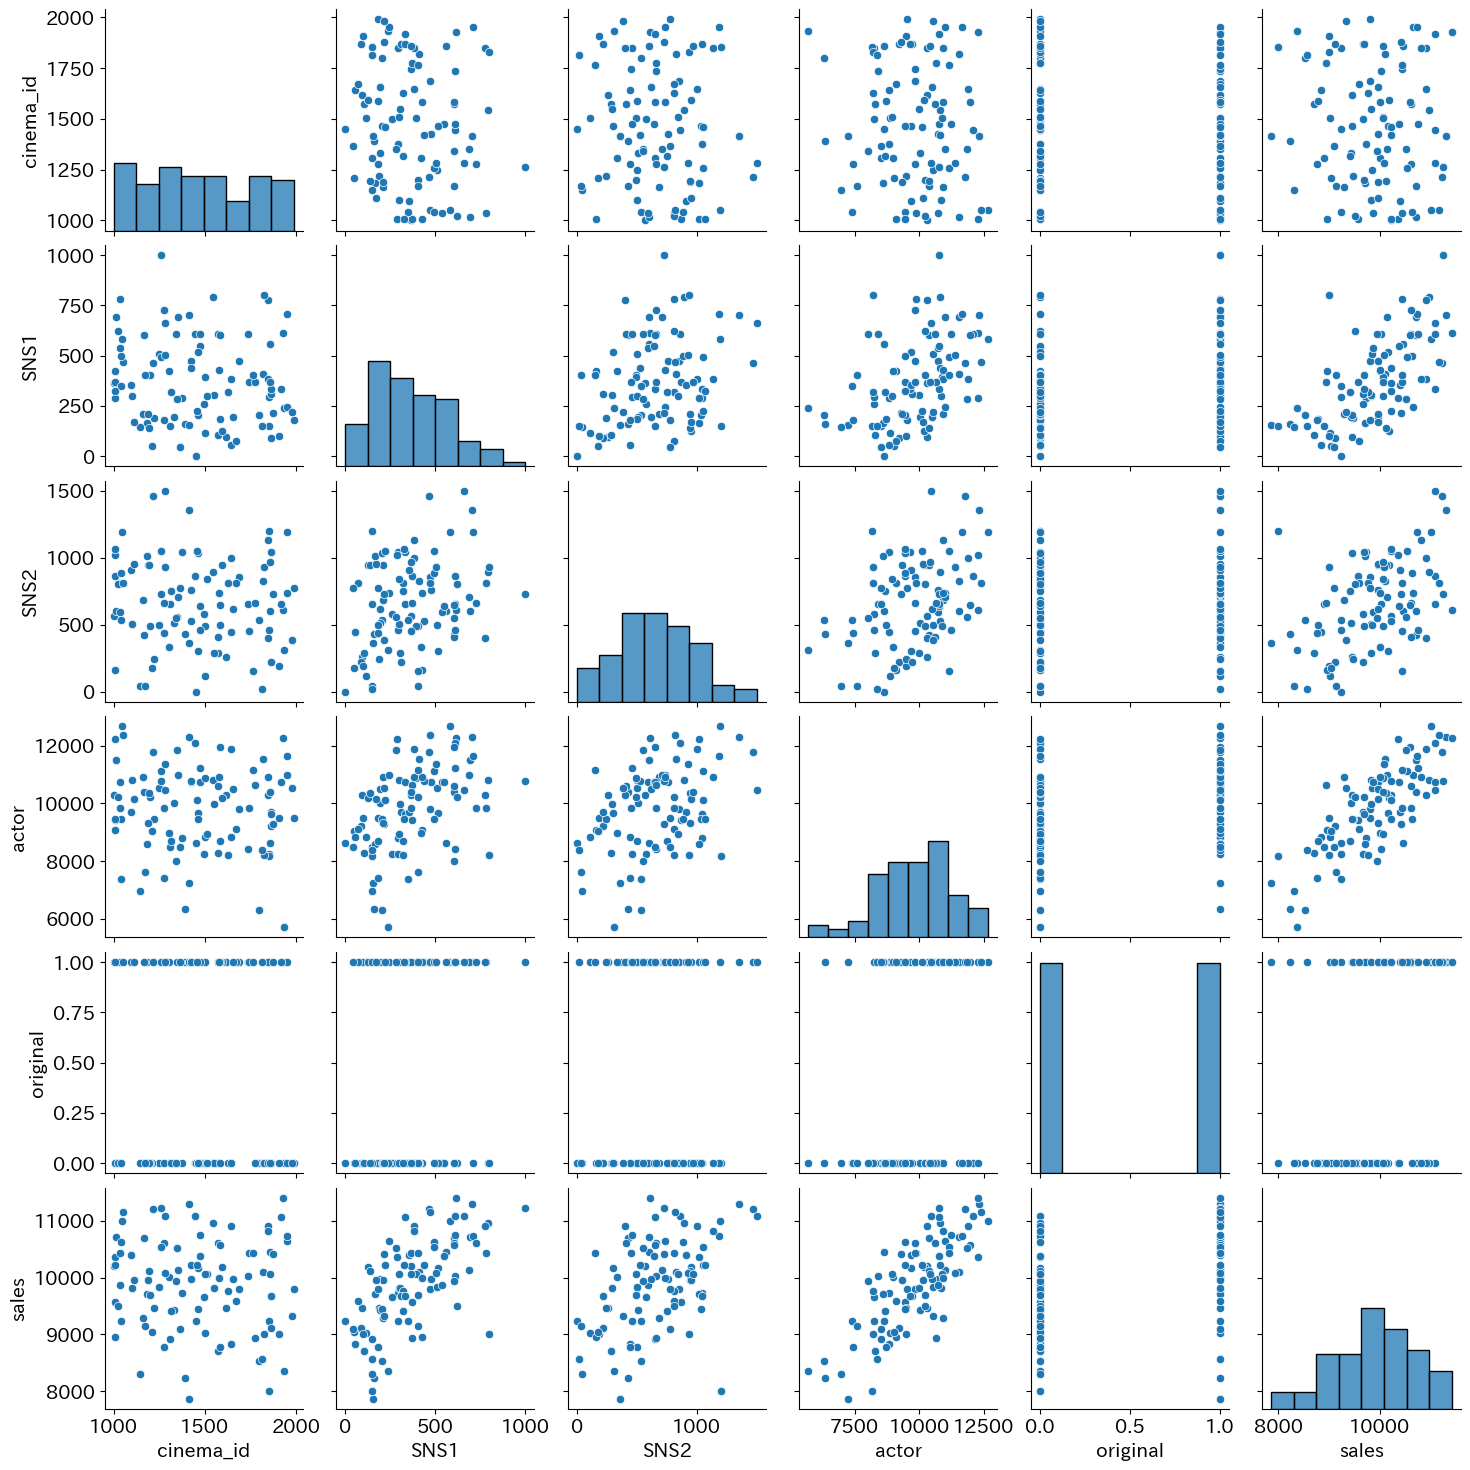

In [ ]:
url = 'https://bit.ly/41qtHPp'
df = pd.read_csv(url)
df = df.fillna(df.mean())
sns.pairplot(df)
plt.show()

* 散布図行列から，SNS2とsalesの散布図で外れ値が確認できる
* SNS1とsalesの散布図でも外れ値らしきものはあるが，今回は通常のデータとして扱う
* SNS2とsalesの散布図で外れ値が確認できたので，SNS2とsalesの散布図のみを作成して，サイズの大きい散布図で再度確認してみる
  
**［以下のコードの処理内容］**
*  1行目: ファイルのURLを変数`url`に代入
*  2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df`に代入
*  3行目: `fillna`メソッドを使って，`df.fillna(df.mean())`とし，欠損値を各説明変数の算術平均にそれぞれ置き換えて変数`df`に代入
*  4行目: `scatter`関数を使って国語と数学の散布図を作成
>*  `df['SNS2']`でx軸を指定
>*  `df['sales']`でy軸を指定
*  5～6行目: `xlabel`関数と`ylabel`関数各軸のラベルをそれぞれ「SNS2」「sales」に設定
*  7行目: `show`関数で，それまでに設定した図（散布図）を実行画面に表示

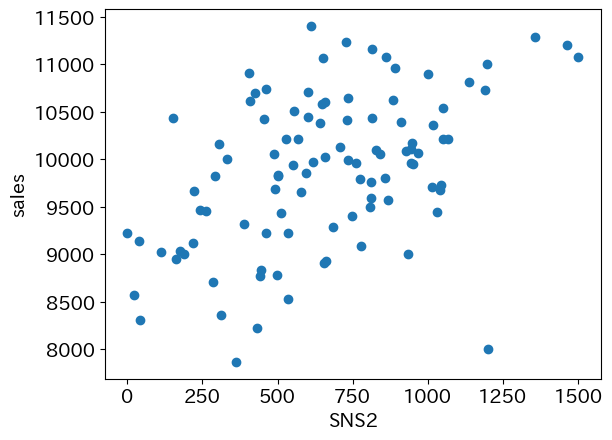

In [ ]:
url = 'https://bit.ly/41qtHPp'
df = pd.read_csv(url)
df = df.fillna(df.mean())
plt.scatter(df['SNS2'], df['sales'])
plt.xlabel('SNS2')
plt.ylabel('sales')
plt.show()

## 外れ値の検索
* 作成した散布図より，外れ値となるデータは，SNS2が1000より大きくて，salesが8500未満であることがわかるので，DataFrameから該当する行データを検索する
* DataFrameにおけるデータの検索は，LMSの共通資料「[ノートブック：SeriesとDataFrameの基本操作](https://colab.research.google.com/github/yoshida-nu/lec_datascience/blob/main/doc/datascience_notebook_se_df.ipynb)」を参照
  
**［以下のコードの処理内容］**
*  1行目: ファイルのURLを変数`url`に代入
*  2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df`に代入
*  3行目: `fillna`メソッドを使って，`df.fillna(df.mean())`とし，欠損値を各説明変数の算術平均にそれぞれ置き換えて変数`df`に代入
*  4行目: DataFrame `df` から，SNS2が1000より大きく（`df['SNS2'] > 1000`），かつsalesが8500未満（`df['sales'] < 8500`）のデータを抽出し，`display`関数で表示
>* 条件式は`(df['SNS2'] > 1000) & (df['sales'] < 8500)`となる

In [15]:
url = 'https://bit.ly/41qtHPp'
df = pd.read_csv(url)
df = df.fillna(df.mean())
display(df[(df['SNS2'] > 1000) & (df['sales'] < 8500)])

,cinema_id,SNS1,SNS2,actor,original,sales
30,1855,149.000,1200,8173.097,0,8000


## 外れ値の削除
* 上記の実行結果より，外れ値がインデックス「30」のデータであることが特定できたので，DataFrameに対する`drop`メソッドを使って，該当データを削除する
* DataFrameにおけるデータの削除は，LMSの共通資料「[ノートブック：SeriesとDataFrameの基本操作](https://colab.research.google.com/github/yoshida-nu/lec_datascience/blob/main/doc/datascience_notebook_se_df.ipynb)」を参照
  
**［以下のコードの処理内容］**
*  1行目: ファイルのURLを変数`url`に代入
*  2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df`に代入
*  3行目: `fillna`メソッドを使って，`df.fillna(df.mean())`とし，欠損値を各説明変数
>* 削除した結果（DataFrame）を変数`df`に代入
*  5行目: `display`関数を使って，`display(df)`とし，`df`の内容を表示
>* データ数（行数）が1個減って，99個になっていることが確認できる

In [16]:
url = 'https://bit.ly/41qtHPp'
df = pd.read_csv(url)
df = df.fillna(df.mean())
df = df.drop(30, axis = 0)
display(df)

,cinema_id,SNS1,SNS2,actor,original,sales
0,1375,291.000,1044,8808.994,0,9731
1,1000,363.000,568,10290.709,1,10210
2,1390,158.000,431,6340.389,1,8227
3,1499,261.000,578,8250.485,0,9658
4,1164,209.000,683,10908.540,0,9286
...,...,...,...,...,...,...
95,1260,494.000,1050,11137.483,1,10537
96,1283,505.000,928,11376.039,1,10084
97,1861,368.000,966,10393.252,0,10069
98,1006,326.000,1068,9454.020,1,10218


## データを説明変数と目的変数（正解データ）に分割
* 前回と同様にして，DataFrame `df` を説明変数`x`と目的変数`t`に分割する  
* さらに，`x`と`t`を訓練データ`(x_train, t_train)`とテストデータ`(x_test, t_test)`に分割する
* 詳細は，[第3回のサンプルノートブック](https://colab.research.google.com/github/yoshida-nu/lec_datascience/blob/main/doc/datascience_notebook03.ipynb)を参照
  
**［以下のコードの処理内容］**
* 1行目: ファイルのURLを変数`url`に代入
* 2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df`に代入
* 3行目: `fillna`メソッドを使って，`df.fillna(df.mean())`とし，欠損値を各説明変数の算術平均にそれぞれ置き換えて変数`df`に代入
* 4行目: `df.drop(30, axis = 0)`で外れ値を削除し，変数`df`に代入
* 5行目: 説明変数の列名を要素とするリスト`['SNS1','SNS2', 'actor', 'original']`を変数`x_cols`に代入
* 6行目: 目的変数の列名（リスト）`['sales']`を変数`t_col`に代入
* 7行目: DataFrame `df` から,`df[x_cols]`で，説明変数の列だけ取り出し変数`x`に代入
* 8行目: DataFrame `df` から,`df[t_col]`で目的変数の列だけ取り出し変数`t`に代入
* 9行目: `model_selection`モジュールの`train_test_split`関数の読み込み
* 10行目: `train_test_split`関数を使って説明変数データ`x`と目的変数データ`t`を訓練データとテストデータにそれぞれ分割
>*  `test_size = 0.2`として，訓練データを8割，テストデータを2割に分割
>*  `random_state = random_seed`として，乱数を固定する ⇒ 結果が同じになる
* 11行目: `print`関数で区切り線「================ x_train ================」を表示
* 12行目: `display`関数で変数`x_train`（訓練データの説明変数データ）を表示
* 13行目: `print`関数で区切り線「================ t_train ================」を表示
* 14行目: `display`関数で変数`t_train`（訓練データの目的変数データ）を表示
* 15行目: `print`関数で区切り線「================ x_test ================」を表示
* 16行目: `display`関数で変数`x_test`（テストデータの説明変数データ）を表示
* 17行目: `print`関数で区切り線「================ t_test ================」を表示
* 18行目: `display`関数で変数`t_test`（テストデータの目的変数データ）を表示

In [19]:
url = 'https://bit.ly/41qtHPp'
df = pd.read_csv(url)
df = df.fillna(df.mean())
df = df.drop(30, axis = 0)
x_cols = ['SNS1','SNS2', 'actor', 'original']
t_col = ['sales']
x = df[x_cols]
t = df[t_col]
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.2, random_state = random_seed)
print('================ x_train ================')
display(x_train)
print('================ t_train ================')
display(t_train)
print('================ x_test ================')
display(x_test)
print('================ t_test ================')
display(t_test)

================ x_train ================


,SNS1,SNS2,actor,original
44,304.000,292,9991.718,0
63,406.000,492,10229.866,0
3,261.000,578,8250.485,0
72,285.000,556,11833.499,1
46,510.000,501,10516.364,0
...,...,...,...,...
96,505.000,928,11376.039,1
68,395.000,490,10869.612,1
65,180.000,441,7419.355,0
48,537.000,594,10722.969,0


================ t_train ================


,sales
44,9824
63,9685
3,9658
72,10513
46,9839
...,...
96,10084
68,10056
65,8772
48,9861


================ x_test ================


,SNS1,SNS2,actor,original
26,101.000,189,9478.256,0
87,469.000,815,12365.674,1
2,158.000,431,6340.389,1
56,50.000,177,9029.442,0
76,610.000,461,11227.732,1
93,606.000,551,7997.044,0
16,558.000,602,8630.429,1
74,623.000,807,10206.430,0
55,311.000,223,9713.273,0
95,494.000,1050,11137.483,1


================ t_test ================


,sales
26,9002
87,11157
2,8227
56,9039
76,10745
93,9938
16,10447
74,9501
55,9668
95,10537


## 線形重回帰モデルの学習と予測
* 線形重回帰モデルの学習と予測の手順は，線形単回帰モデルの学習と同様
  
**［以下のコードの処理内容］**
* 1行目: ファイルのURLを変数`url`に代入
* 2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df`に代入
* 3行目: `fillna`メソッドを使って，`df.fillna(df.mean())`とし，欠損値を各説明変数の算術平均にそれぞれ置き換えて変数`df`に代入
* 4行目: `df.drop(30, axis = 0)`で外れ値を削除し，変数`df`に代入
* 5行目: 説明変数の列名を要素とするリスト`['SNS1','SNS2', 'actor', 'original']`を変数`x_cols`に代入
* 6行目: 目的変数の列名（リスト）`['sales']`を変数`t_col`に代入
* 7行目: DataFrame `df` から,`df[x_cols]`で，説明変数の列だけ取り出し変数`x`に代入
* 8行目: DataFrame `df` から,`df[t_col]`で目的変数の列だけ取り出し変数`t`に代入
* 9行目: `model_selection`モジュールの`train_test_split`関数の読み込み
* 10行目: `train_test_split`関数を使って説明変数データ`x`と目的変数データ`t`を訓練データとテストデータにそれぞれ分割
* 11行目:  `sklearn` (scikit-learn) の`linear_model`モジュール内にある`LinearRegression`クラスを読み込む 
* 12行目: `LinearRegression()`で，線形回帰モデルの学習を行うためのオブジェクトを`LinearRegression`クラスから生成し，変数`linear_regression_model`に代入
* 13行目: `fit`メソッドで線形回帰モデルの学習を実行
* 14行目: 新しい2個の説明変数データのリスト`[[150, 700, 300, 0], [200, 500, 400, 1]]`を変数`newdata`に代入
* 15行目: `predict`メソッドを用いて，新たな説明変数データ`newdata`に対する予測を行い，その結果（`predict`メソッドの戻り値）を変数`y_pred`に代入
>*  `predict`メソッドの引数で指定する`X`のクラス（データ型）は，厳密には ndarray または DataFrame にする必要がある
>*  ここでは，問題なく実行できるので，リストのまま使用している
* 16行目: `print`関数で，「予測結果：」と表示
* 17行目: 予測結果`y_pred`を`print`関数で表示

In [21]:
url = 'https://bit.ly/41qtHPp'
df = pd.read_csv(url)
df = df.fillna(df.mean())
df = df.drop(30, axis = 0)
x_cols = ['SNS1','SNS2', 'actor', 'original']
t_col = ['sales']
x = df[x_cols]
t = df[t_col]
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.2, random_state = random_seed)
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression()
linear_regression_model.fit(X = x_train, y = t_train)
newdata = [[150, 700, 300, 0], [200, 500, 400, 1]]
y_pred = linear_regression_model.predict(X = newdata)
print('予測結果：')
print(y_pred)

予測結果：
[[6874.11 ]
 [7063.562]]


## モデルの評価
* 線形単回帰モデルと同様に，決定係数でモデルを評価する

  
**［以下のコードの処理内容］**
* 1行目: ファイルのURLを変数`url`に代入
* 2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df`に代入
* 3行目: `fillna`メソッドを使って，`df.fillna(df.mean())`とし，欠損値を各説明変数の算術平均にそれぞれ置き換えて変数`df`に代入
* 4行目: `df.drop(30, axis = 0)`で外れ値を削除し，変数`df`に代入
* 5行目: 説明変数の列名を要素とするリスト`['SNS1','SNS2', 'actor', 'original']`を変数`x_cols`に代入
* 6行目: 目的変数の列名（リスト）`['sales']`を変数`t_col`に代入
* 7行目: DataFrame `df` から,`df[x_cols]`で，説明変数の列だけ取り出し変数`x`に代入
* 8行目: DataFrame `df` から,`df[t_col]`で目的変数の列だけ取り出し変数`t`に代入
* 9行目: `model_selection`モジュールの`train_test_split`関数の読み込み
* 10行目: `train_test_split`関数を使って説明変数データ`x`と目的変数データ`t`を訓練データとテストデータにそれぞれ分割
* 11行目:  `sklearn` (scikit-learn) の`linear_model`モジュール内にある`LinearRegression`クラスを読み込む 
* 12行目: `LinearRegression()`で，線形回帰モデルの学習を行うためのオブジェクトを`LinearRegression`クラスから生成し，変数`linear_regression_model`に代入
* 13行目: `fit`メソッドで線形回帰モデルの学習を実行
* 14行目: `linear_regression_model.score(X = x_train, y = t_train)`で，訓練データに対する決定係数を計算して変数`score_train`に代入
* 15行目: `linear_regression_model.score(X = x_test, y = t_test)`で，テストデータに対する決定係数を計算して変数`score_test`に代入
* 16行目: `print`関数とf-stringを使って，訓練データに対する決定係数（`score_train`）とテストデータに対する決定係数（`score_test`）を小数点以下3桁まで表示

In [23]:
url = 'https://bit.ly/41qtHPp'
df = pd.read_csv(url)
df = df.fillna(df.mean())
df = df.drop(30, axis = 0)
x_cols = ['SNS1','SNS2', 'actor', 'original']
t_col = ['sales']
x = df[x_cols]
t = df[t_col]
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.2, random_state = random_seed)
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression()
linear_regression_model.fit(X = x_train, y = t_train)
score_train = linear_regression_model.score(X = x_train, y = t_train)
score_test = linear_regression_model.score(X = x_test, y = t_test)
print(f'訓練データの決定係数={score_train:.3f} / テストデータの決定係数={score_test:.3f}')

訓練データの決定係数=0.759 / テストデータの決定係数=0.790


## 回帰係数の確認
* 学習した線形重回帰モデルの回帰係数を確認する
* 確認方法は線形単回帰モデルと同様
  
**［以下のコードの処理内容］**
* 1行目: ファイルのURLを変数`url`に代入
* 2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df`に代入
* 3行目: `fillna`メソッドを使って，`df.fillna(df.mean())`とし，欠損値を各説明変数の算術平均にそれぞれ置き換えて変数`df`に代入
* 4行目: `df.drop(30, axis = 0)`で外れ値を削除し，変数`df`に代入
* 5行目: 説明変数の列名を要素とするリスト`['SNS1','SNS2', 'actor', 'original']`を変数`x_cols`に代入
* 6行目: 目的変数の列名（リスト）`['sales']`を変数`t_col`に代入
* 7行目: DataFrame `df` から,`df[x_cols]`で，説明変数の列だけ取り出し変数`x`に代入
* 8行目: DataFrame `df` から,`df[t_col]`で目的変数の列だけ取り出し変数`t`に代入
* 9行目: `model_selection`モジュールの`train_test_split`関数の読み込み
* 10行目: `train_test_split`関数を使って説明変数データ`x`と目的変数データ`t`を訓練データとテストデータにそれぞれ分割
* 11行目:  `sklearn` (scikit-learn) の`linear_model`モジュール内にある`LinearRegression`クラスを読み込む 
* 12行目: `LinearRegression()`で，線形回帰モデルの学習を行うためのオブジェクトを`LinearRegression`クラスから生成し，変数`linear_regression_model`に代入
* 13行目: `fit`メソッドで線形回帰モデルの学習を実行
* 14行目: `coef_`属性から回帰係数（定数項以外）を取り出し，変数`a`に代入
* 15行目: `intercept_`属性から定数項を取り出し，変数`b`に代入
* 16行目: `print`関数とf-stringを使って，回帰係数`a`を表示
* 17行目: `print`関数とf-stringを使って，定数項`b`を小数点以下3桁で表示

In [25]:
url = 'https://bit.ly/41qtHPp'
df = pd.read_csv(url)
df = df.fillna(df.mean())
df = df.drop(30, axis = 0)
x_cols = ['SNS1','SNS2', 'actor', 'original']
t_col = ['sales']
x = df[x_cols]
t = df[t_col]
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.2, random_state = random_seed)
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression()
linear_regression_model.fit(X = x_train, y = t_train)
a = linear_regression_model.coef_
b = linear_regression_model.intercept_
print(f'回帰係数（定数項以外）: {a}')
print(f'定数項: {b}')

回帰係数（定数項以外）: [[  1.076   0.534   0.285 213.956]]
定数項: [6253.419]


## モデルの当てはまりの良さの可視化
* テストデータを使って，モデルから予測した値と実際の値との当てはまりの良さを可視化する
* 具体的には，テストデータの `x_test`と`t_test`を使って，`t_test`と`x_test`に対するモデルの予測値との散布図を作成する
* この散布図における点が傾きが1で切片が0の直線 $y=x$に近いほど（直線上に乗っているほど）当てはまりが良いと言える
  
**［以下のコードの処理内容］**
* 1行目: ファイルのURLを変数`url`に代入
* 2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df`に代入
* 3行目: `fillna`メソッドを使って，`df.fillna(df.mean())`とし，欠損値を各説明変数の算術平均にそれぞれ置き換えて変数`df`に代入
* 4行目: `df.drop(30, axis = 0)`で外れ値を削除し，変数`df`に代入
* 5行目: 説明変数の列名を要素とするリスト`['SNS1','SNS2', 'actor', 'original']`を変数`x_cols`に代入
* 6行目: 目的変数の列名（リスト）`['sales']`を変数`t_col`に代入
* 7行目: DataFrame `df` から,`df[x_cols]`で，説明変数の列だけ取り出し変数`x`に代入
* 8行目: DataFrame `df` から,`df[t_col]`で目的変数の列だけ取り出し変数`t`に代入
* 9行目: `model_selection`モジュールの`train_test_split`関数の読み込み
* 10行目: `train_test_split`関数を使って説明変数データ`x`と目的変数データ`t`を訓練データとテストデータにそれぞれ分割
* 11行目:  `sklearn` (scikit-learn) の`linear_model`モジュール内にある`LinearRegression`クラスを読み込む 
* 12行目: `LinearRegression()`で，線形回帰モデルの学習を行うためのオブジェクトを`LinearRegression`クラスから生成し，変数`linear_regression_model`に代入
* 13行目: `fit`メソッドで線形回帰モデルの学習を実行
* 14行目: `predict`メソッドを使って，テストデータ`x_test`に対する予測値を求め，変数`t_pred`に代入
* 15行目: `scatter`関数を使って，正解データ（目的変数の値）である`t_test`と予測値`t_pred`の散布図を作成
* 16～17行目: `xlabel`関数と`ylabel`関数各軸のラベルをそれぞれ「正解データ」「予測値」に設定
* 18行目: `plot`関数を使って，`plt.plot([8000, 11500], [8000, 11500])`とし，直線 $y=x$のグラフを作成
>*  正確には，2つの点 (8000, 8000)と(11500, 11500)を線でつないでいる
* 19行目: `show`関数で，それまでに設定した図（散布図と直線 $y=x$）を実行画面に表示


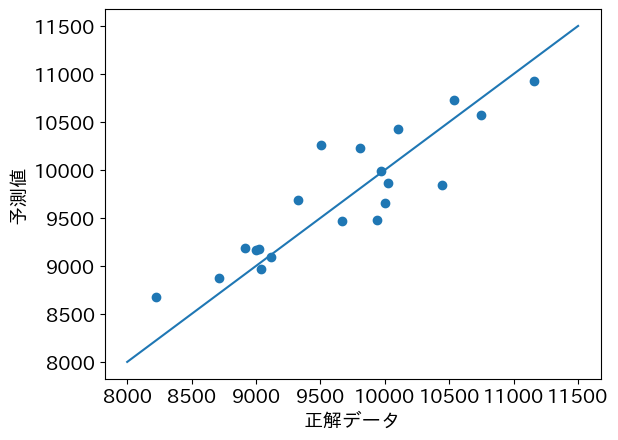

In [26]:
url = 'https://bit.ly/41qtHPp'
df = pd.read_csv(url)
df = df.fillna(df.mean())
df = df.drop(30, axis = 0)
x_cols = ['SNS1','SNS2', 'actor', 'original']
t_col = ['sales']
x = df[x_cols]
t = df[t_col]
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.2, random_state = random_seed)
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression()
linear_regression_model.fit(X = x_train, y = t_train)
t_pred = linear_regression_model.predict(X = x_test)
plt.scatter(t_test, t_pred)
plt.xlabel('正解データ')
plt.ylabel('予測値')
plt.plot([8000, 11500], [8000, 11500])
plt.show()

## 一連の分析のまとめ
* 最後に線形回帰モデルの学習，予測，及び評価の一連の分析をまとめる
  
**［以下のコードの処理内容］**
* 1行目: ファイルのURLを変数`url`に代入
* 2行目: pandasの`read_csv`関数を使って，ファイルをDataFrameとして読み込んで，変数`df`に代入
* 3行目: `fillna`メソッドを使って，`df.fillna(df.mean())`とし，欠損値を各説明変数の算術平均にそれぞれ置き換えて変数`df`に代入
* 4行目: `df.drop(30, axis = 0)`で外れ値を削除し，変数`df`に代入
* 5行目: 説明変数の列名を要素とするリスト`['SNS1','SNS2', 'actor', 'original']`を変数`x_cols`に代入
* 6行目: 目的変数の列名（リスト）`['sales']`を変数`t_col`に代入
* 7行目: DataFrame `df` から,`df[x_cols]`で，説明変数の列だけ取り出し変数`x`に代入
* 8行目: DataFrame `df` から,`df[t_col]`で目的変数の列だけ取り出し変数`t`に代入
* 9行目: `model_selection`モジュールの`train_test_split`関数の読み込み
* 10行目: `train_test_split`関数を使って説明変数データ`x`と目的変数データ`t`を訓練データとテストデータにそれぞれ分割
* 11行目:  `sklearn` (scikit-learn) の`linear_model`モジュール内にある`LinearRegression`クラスを読み込む 
* 12行目: `LinearRegression()`で，線形回帰モデルの学習を行うためのオブジェクトを`LinearRegression`クラスから生成し，変数`linear_regression_model`に代入
* 13行目: 訓練データ`x_train`と`t_train`を用いて，`fit`メソッドで線形回帰モデルの学習を実行
* 14行目: 新しい1個の説明変数データ（`['SNS1','SNS2', 'actor', 'original']`）のリスト`[[300, 1000, 7000, 1]]`を変数`newdata`に代入
* 15行目: `predict`メソッドを用いて，`newdata`に対する予測を行い，その結果を変数`y_pred`に代入
* 16行目: `print`関数とf-stringを使って，予測結果`y_pred`を表示
* 17行目: `linear_regression_model.score(X = x_train, y = t_train)`で，訓練データに対する決定係数を計算して変数`score_train`に代入
* 18行目: `linear_regression_model.score(X = x_test, y = t_test)`で，テストデータに対する決定係数を計算して変数`score_test`に代入
* 19行目: `print`関数とf-stringを使って，訓練データに対する決定係数（`score_train`）とテストデータに対する決定係数（`score_test`）を小数点以下3桁まで表示
* 20行目: `coef_`属性から回帰係数（定数項以外）を取り出し，変数`a`に代入
* 21行目: `intercept_`属性から定数項を取り出し，変数`b`に代入
* 22行目: `print`関数とf-stringを使って，回帰係数`a`を表示
* 23行目: `print`関数とf-stringを使って，定数項`b`を表示


In [ ]:
url = 'https://bit.ly/41qtHPp'
df = pd.read_csv(url)
df = df.fillna(df.mean())
df = df.drop(30, axis = 0)
x_cols = ['SNS1','SNS2', 'actor', 'original']
t_col = ['sales']
x = df[x_cols]
t = df[t_col]
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.2, random_state = random_seed)
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression()
linear_regression_model.fit(X = x_train, y = t_train)
newdata = [[300, 1000, 7000, 1]]
y_pred = linear_regression_model.predict(X = newdata)
print(f'予測結果： {y_pred}')
score_train = linear_regression_model.score(X = x_train, y = t_train)
score_test = linear_regression_model.score(X = x_test, y = t_test)
print(f'訓練データの決定係数={score_train:.3f} / テストデータの決定係数={score_test:.3f}')
a = linear_regression_model.coef_
b = linear_regression_model.intercept_
print(f'回帰係数（定数項以外）: {a}')
print(f'定数項: {b}')

予測結果： [[9317.476]]
訓練データの決定係数=0.759 / テストデータの決定係数=0.790
回帰係数（定数項以外）: [[  1.076   0.534   0.285 213.956]]
定数項: [6253.419]
